Recordemos que la distribución de probabilidad normal o gaussiana está dada por:
$$P(X) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{X-\mu}{\sigma} \right)^2
\right]}$$
donde:
$\mu$: media de la distribución
$\sigma$: desviación estandar de la distribución
Ejemplo : considerando una variable aleatoria que sigue una distribución normal con media
$\mu=4$ y desviación estándar $\sigma=0.3$, la probabilidad de que dicha variable tome el
valor de $0.2$ está dada por:
$$P(0.2) = \frac{1}{0.3 \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{0.2-4}{0.3} \right)^2
\right]}$$
Lo cual en Python se traduce en:


In [6]:
from scipy.stats import norm
mu = 0.5
sigma = 0.1
X = 0.245
norm(mu, sigma).pdf(X)

0.15449347134395172

Así también, la distribucion de probabilidad acumulada correspondiente está dada por:
$$C(X) = \int_{x<=X} P(x)dx = \int_{- \infty}^xP(X)dX $$
teniendo en cuenta que $Dom(X) = (-\infty, \infty)$.
Ejemplo : considerando una variable aleatoria que sigue una distribucion normal con media
$\mu=4$ y desviación estándar $\sigma=0.3$, la probabilidad de que dicha variable tome el
valor de $0.2$ o menos está dada por:
$$C(0.2) = \int_{x<=0.2} P(x)dx = \int_{- \infty}^{0.2} \left\{\frac{1}{0.3 \sqrt{2 \pi}} \exp{\left[-
\frac{1}{2}\left(\frac{X-4}{0.3} \right)^2 \right]} \right\} dX $$
La cual se calcula en Python como:

In [7]:
norm(mu, sigma).cdf(X)

0.005386145954066687

In [27]:
import numpy as np
from numpy.random import binomial
from matplotlib import pyplot 
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.stats import norm
import pandas as pd

<BarContainer object of 41 artists>

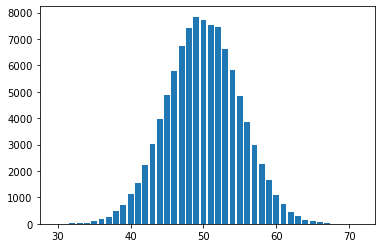

In [21]:
def generate_binomial_trials(trials=1000, coin_toss=100):
    '''
    el resultado de esta funcion es generar un conjuntos
    de experimentos binomiales (trials) y de cada uno obtener
    las cantidades de exitos en cada secuencia (e.j. lanzar monedas).
    * trial: es una secuencia de <coin_toss> lanzamientos de moneda
    * coin_toss: es el numero de monedas lanzadas en cada trial
    '''
    arr = []
    for _ in range(trials):
        arr.append(binomial(coin_toss, 0.5))
    values, dist = np.unique(arr, return_counts=True)
    return values, dist, arr
values, dist, arr = generate_binomial_trials(100000)
plt.bar(values, dist)

# Estimación Parametrica

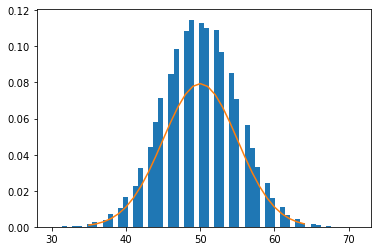

In [40]:
data = pd.Series(arr)
mu = data.mean()
sd = data.std()
distr = norm(mu,sd)
values = np.arange(35,65,1)
probabilities = [distr.pdf(value) for value in values]

pyplot.hist(data, bins=60, density=True)
pyplot.plot(values, probabilities)